## Assignment 2 - 02601 Numerical algorithms
### s214643
### 14/10-2022

## 1) Multiple choice

A) Answer: 4. There cannot be two points with the same x values.


B) Answer: 2. 0.50000

In [67]:
from functionality.interpolation import cardinal_polynomials
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(10,20,11, endpoint=True)
nodes = [15,18,22]
cd = cardinal_polynomials(nodes, 1, t)
cd[6]

0.5

C) Answer: 3. 23

In [68]:
import math
for n in range(1,30):
    h = 2/n
    M = 5**(n+1)*math.exp(5*2)
    error = 1 / (4*(n+1)) * h**(n+1) * M
    if error < 1e-6:
        print(n)
        break

23


D) Answer: 3, Simpson < Composite trapezoid < Trapezoid

In [69]:
def simpson(a,b, y):
    h = (b-a)/2
    return (h/3)*(y[0]+4*y[1]+y[2])

def trapezoid(a,b, y):
    h = b - a
    return (h/2)*(y[0]+y[-1])

def comp_trap(a,b, y):
    n = len(y)-1
    h = (b-a)/n
    edge_vals = 0.5*(y[0]+y[-1])
    return h*(edge_vals+sum(y[1:-1]))

print(f"Simpson: {round(simpson(1,3,[2,2,3]),2)}")
print(f"Trapezoid: {round(trapezoid(1,3,[2,2,3]),2)}")
print(f"Composite trapezoid: {round(comp_trap(1,3,[2,2,3]),2)}")

Simpson: 4.33
Trapezoid: 5.0
Composite trapezoid: 4.5


## 2) Interpolation

A):

\begin{align*}
l_0(x) =& \left(\frac{x-2}{1-2}\right)\left(\frac{x-3}{1-3}\right) \\
l_1(x) =& \left(\frac{x-1}{2-1}\right)\left(\frac{x-3}{2-3}\right) \\
l_2(x) =& \left(\frac{x-1}{3-1}\right)\left(\frac{x-2}{3-2}\right)
\end{align*}
$$P_2(x) = ln(1)l_0(x) + ln(2)l_1(x) + ln(3)l_2(x) = ln(2)l_1(x) + ln(3)l_2(x)$$

B):
$$
\frac{1}{4(n+1)}Mh^{n+1}
$$

$$
n = 2, \quad h = \frac{3-1}{n}=1, \quad M = \max_{x\in[1,3]}\frac{2}{x^3}=2
$$

$$
error = \frac{1}{4(2+1)} \cdot 2 \cdot 1^{2+1} = 6
$$

## 3) Composite Simpsons rule

A) Implementing the function

In [70]:
def MySimpson(f, a,b,n):
    if n % 2 == 1:
        print(f"ERROR: n={n} is not even")
        return float("NaN")
    h = (b-a) / n
    nodes = np.linspace(a,b,n+1, endpoint=True)
    comp_simpson = 0
    for a,b in zip(nodes[::2], nodes[1::2]):
        comp_simpson += (f(a) + 4*f(a+h) + f(b))
    
    return (h/3)*comp_simpson

In [143]:
def MySimpson(f, a,b,n):
    if n % 2 == 1:
        print(f"ERROR: n={n} is not even")
        return float("NaN")
    h = (b-a) / n
    nodes = np.linspace(a,b,n+1, endpoint=True)
    comp_simpson = (h/3)*(f(a)+f(b))
    
    comp_simpson += ((4 * h)/3) * sum([f(a+(2*i-1)*h) for i in range(1, int(n/2)+1)])
    comp_simpson += ((2 * h)/3) * sum([f(a+2*i*h) for i in range(1, int((n-2)/2)+1)])
    
    return comp_simpson

B) Testing with ploynomial of degree 3

In [144]:
import pandas as pd

## TEST FUNCTIONS

f = lambda x: 4*x**3 + 3*x**2 + 2*x + 1
int_f = lambda x: x**4 + x**3 + x**2 + x


## ERROR TABLE
a, b = 0, 1
actual = int_f(b)-int_f(a)
n_list, numerical, error = list(), list(), list()
for n in (2,3,20):
    estimat = MySimpson(f, a,b, n)
    n_list.append(n)
    numerical.append(estimat)
    error.append(abs(actual - estimat))

pd.DataFrame({"n": n_list, "Numerical estimation": numerical, "Error": error})


ERROR: n=3 is not even


,n,Numerical estimation,Error
0,2,4.0,0.0
1,3,NaN,NaN
2,20,4.0,0.0


As n increases in the polynomial test, we know that a polynomial of degree 3 can be approximated without error. This checks out.

C) Testing with sine function

In [145]:
import pandas as pd

## TEST FUNCTIONS

f = lambda x: math.sin(x)
int_f = lambda x: - math.cos(x)


## ERROR TABLE
a, b = 0, math.pi
actual = int_f(b)-int_f(a)
n_list, numerical, error = list(), list(), list()
for n in range(2,21,2):
    estimat = MySimpson(f, a,b, n)
    n_list.append(n)
    numerical.append(estimat)
    error.append(abs(actual- estimat))

pd.DataFrame({"n": n_list, "Numerical estimation": numerical, "Error": error})

,n,Numerical estimation,Error
0,2,2.094395,0.094395
1,4,2.004560,0.004560
2,6,2.000863,0.000863
3,8,2.000269,0.000269
4,10,2.000110,0.000110
5,12,2.000053,0.000053
6,14,2.000028,0.000028
7,16,2.000017,0.000017
8,18,2.000010,0.000010
9,20,2.000007,0.000007


Here we test for a couple of more values of n, now testing the integral of a sine function. We see the error reducing rapidly as n increases.
It seems this function is easier to estimate.

D) Upper bound for absolute error

Using the error theorem (8) from the book:
$$
-\frac{1}{180} (b-a) h^4 f^{(4)}(\xi)
$$
And inserting our values:
$$
a = 0, \quad b = \pi, \quad h = \frac{\pi}{n}, \quad M = 1
$$
We can find the theoretical upper bound for the error as:
$$
-\frac{1}{180}\frac{\pi^5}{n^4}
$$

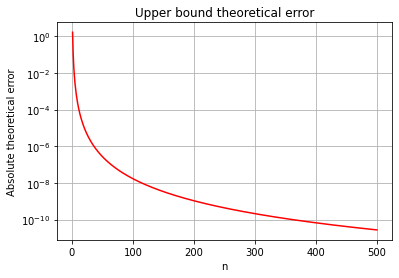

In [151]:
x = np.linspace(1, 500, 500, endpoint=True)
plt.plot(x, [-(-1/180 * (math.pi**5)/(n**4)) for n in x], 'r')
plt.xlabel("n")
plt.ylabel("Absolute theoretical error")
plt.grid()
plt.yscale('log')
plt.title("Upper bound theoretical error")
plt.show()

E) Testing the n for a maximum error of 1e-5, and checking with composite trapezoid function

Lowest n with error below 1e-5 is: n = 20


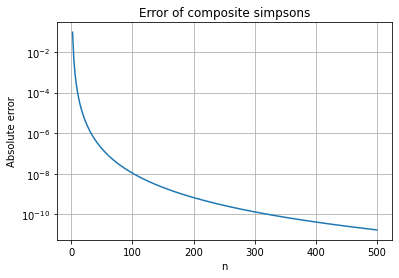

In [147]:
## Test of minimal error (below 1e-5)
f = lambda x: math.sin(x)
int_f = lambda x: - math.cos(x)

a, b = 0, math.pi
actual = int_f(b)-int_f(a)

for n in range(2,500,2):
    estimat = MySimpson(f, a,b, n)
    error = abs(estimat-actual)
    if error < 1e-5:
        print(f"Lowest n with error below 1e-5 is: n = {n}")
        break

x = np.linspace(2,500, 499, endpoint=True)
plt.plot(x[::2], [abs(MySimpson(f, 0,math.pi, int(n))-2) for n in x[::2]])
plt.yscale('log')
plt.grid()
plt.xlabel("n")
plt.ylabel("Absolute error")
plt.title("Error of composite simpsons")
plt.show()

The lowest n with an error less than 1e-5 is 20. This is fairly good.

Next: showing that the theoretical upper bound error is indeed an upper bound for the error

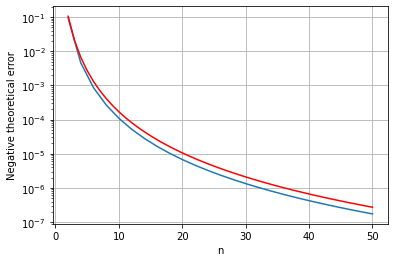

In [152]:
x = np.linspace(2, 50, 49, endpoint=True)
plt.plot(x[::2], [(abs(MySimpson(f, 0,math.pi, int(n))-2)) for n in x[::2]])
plt.plot(x, [((1/180 * (math.pi**5)/(n**4))) for n in x], 'r')
plt.xlabel("n")
plt.ylabel("Negative theoretical error")
plt.grid()
plt.yscale('log')
plt.show()

Except for a few outliers in the begining, it is clearly shown that the upper bound (in red) has a higher error for any number of intervals (n) than the calculated error (in blue).

Finding error of composite trapezoid function

Lowest n with error below 1e-5 is: n = 406


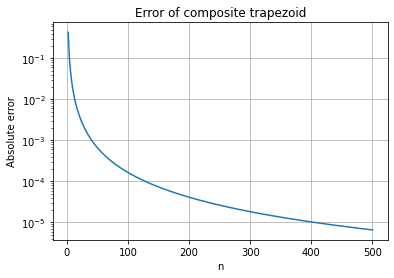

In [105]:
## same check as above, but with composite trapezoid

def comp_trap(f, a,b, n):
    x = np.linspace(a,b,n+1,endpoint=True)
    h = (b-a) / n
    edge_vals = 0.5 * (f(x[0]) + f(x[-1]))
    return h * (edge_vals + sum([f(x_i) for x_i in x[1:-1]]))

f = lambda x: math.sin(x)
int_f = lambda x: - math.cos(x)

a, b = 0, math.pi
actual = int_f(b)-int_f(a)

for n in range(2,500,2):
    estimat = comp_trap(f, a,b, n)
    error = abs(estimat-actual)
    if error < 1e-5:
        print(f"Lowest n with error below 1e-5 is: n = {n}")
        break

x = np.linspace(2,500, 499, endpoint=True)
plt.plot(x[::2], [abs(comp_trap(f, 0,math.pi, int(n))-2) for n in x[::2]])
plt.yscale('log')
plt.grid()
plt.xlabel("n")
plt.ylabel("Absolute error")
plt.title("Error of composite trapezoid")
plt.show()

The lowest n with an error less than 1e-5 is 406. It seems that the comp. trapezoid error falls with $\frac{1}{2^2}$, where the comp. simpsons falls with $\frac{1}{4^2}$. The Composite simpsons model is therefor the fastest of the two.